In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_validation_samples = 5000
x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]


In [ ]:
base_model = MobileNet(weights=None, input_shape=(32, 32, 3), include_top=False)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.0920 - val_loss: 2.3028
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.0993 - loss: 2.3026 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.0980 - loss: 2.3027 - 

In [ ]:
optimizers_list = [optimizers.Adam, optimizers.SGD]
learning_rates = [0.001, 0.0001]
dropout_rates = [0.3, 0.5]
l2_regularizations = [0.001, 0.0001]

results = []

for opt in optimizers_list:
    for lr in learning_rates:
        for dropout_rate in dropout_rates:
            for l2_reg in l2_regularizations:
                base_model = MobileNet(weights=None, input_shape=(32, 32, 3), include_top=False)
                base_model.trainable = False
                
                model = models.Sequential([
                    base_model,
                    layers.GlobalAveragePooling2D(),
                    layers.Dropout(dropout_rate),
                    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg))
                ])
                
                model.compile(optimizer=opt(learning_rate=lr), 
                              loss='sparse_categorical_crossentropy', 
                              metrics=['accuracy'])
                
                history = model.fit(x_train, y_train,
                                    epochs=5,
                                    batch_size=64,
                                    validation_data=(x_val, y_val),
                                    verbose=0)
                
                val_accuracy = history.history['val_accuracy'][-1]
                results.append((opt.__name__, lr, dropout_rate, l2_reg, val_accuracy))
                
                print(f'Optimizer: {opt.__name__}, Learning Rate: {lr}, Dropout: {dropout_rate}, '
                      f'L2: {l2_reg}, Validation Accuracy: {val_accuracy}')

best_config = max(results, key=lambda x: x[-1])
print(f"\nBest parameter: Optimizer={best_config[0]}, Learning Rate={best_config[1]}, "
      f"Dropout={best_config[2]}, L2={best_config[3]}")

Optimizer: Adam, Learning Rate: 0.001, Dropout: 0.3, L2: 0.001, Validation Accuracy: 0.09200000017881393
Optimizer: Adam, Learning Rate: 0.001, Dropout: 0.3, L2: 0.0001, Validation Accuracy: 0.09759999811649323
Optimizer: Adam, Learning Rate: 0.001, Dropout: 0.5, L2: 0.001, Validation Accuracy: 0.09759999811649323
Optimizer: Adam, Learning Rate: 0.001, Dropout: 0.5, L2: 0.0001, Validation Accuracy: 0.09200000017881393
Optimizer: Adam, Learning Rate: 0.0001, Dropout: 0.3, L2: 0.001, Validation Accuracy: 0.09200000017881393
Optimizer: Adam, Learning Rate: 0.0001, Dropout: 0.3, L2: 0.0001, Validation Accuracy: 0.09200000017881393
Optimizer: Adam, Learning Rate: 0.0001, Dropout: 0.5, L2: 0.001, Validation Accuracy: 0.09200000017881393
Optimizer: Adam, Learning Rate: 0.0001, Dropout: 0.5, L2: 0.0001, Validation Accuracy: 0.09200000017881393
Optimizer: SGD, Learning Rate: 0.001, Dropout: 0.3, L2: 0.001, Validation Accuracy: 0.09200000017881393
Optimizer: SGD, Learning Rate: 0.001, Dropout: 0

In [ ]:
best_optimizer = getattr(optimizers, best_config[0])(learning_rate=best_config[1])
best_dropout_rate = best_config[2]
best_l2_reg = best_config[3]

base_model = MobileNet(weights=None, input_shape=(32, 32, 3), include_top=False)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(best_dropout_rate),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(best_l2_reg))
])

model.compile(optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
final_history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                          validation_data=(x_val, y_val), verbose=1)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Best test accuracy: {test_accuracy:.4f}, Best tset loss: {test_loss:.4f}')

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.0987 - loss: 2.3030 - val_accuracy: 0.0920 - val_loss: 2.3027
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.1013 - loss: 2.3026 - val_accuracy: 0.0976 - val_loss: 2.3029
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.1021 - loss: 2.3027 - val_accuracy: 0.0920 - val_loss: 2.3027
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3030
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.0972 - val_loss: 2.3028
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.0991 - loss: 2.3027 - 

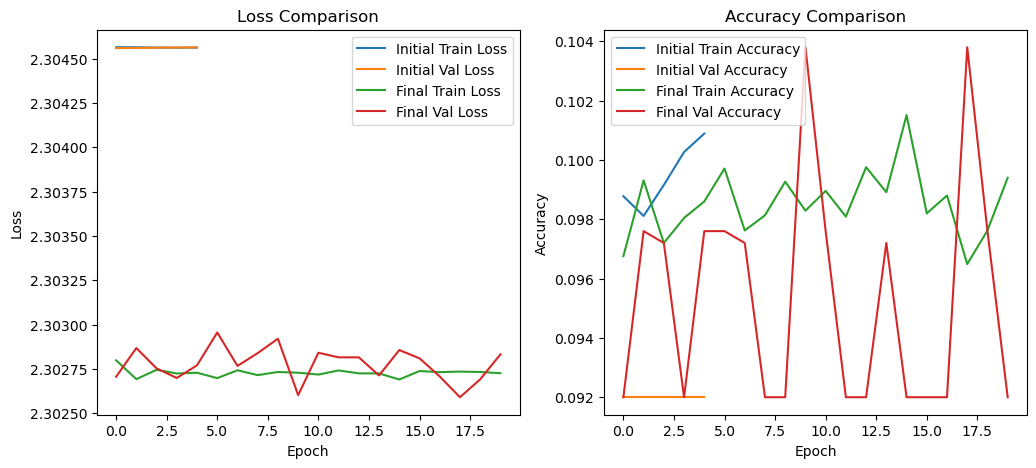

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Initial Train Loss')
plt.plot(history.history['val_loss'], label='Initial Val Loss')
plt.plot(final_history.history['loss'], label='Final Train Loss')
plt.plot(final_history.history['val_loss'], label='Final Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Initial Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Val Accuracy')
plt.plot(final_history.history['accuracy'], label='Final Train Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Final Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')
plt.show()